## California House Price ML Modelling

- We have California State house price data set 
- We want to predict the median housing price in a block/district given some features
- This modelling may cut the company's costs considerably. The managemant will not need to consult a team of experts.
- Moreover, this may imporove the research team's speed of analysis.
- First, let's import the required packages and data

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras


## Train Test Splitting & Scaling

- The data we need is house in the Sci-Kit learn package.
- However we download the data from the github respository instead

### Data Exploration:

- We will use a Supervised learning approach since our data comes with labels.
- The performance of the algorithms will be measured by the root Mean Square Error (RMSE):
$$
RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n (\hat{y}_i-y_i)^2}
$$
where $\hat{y}_i = h(\bf{x}_i)$ is the $i^{th}$ model estimated price for the $i^{th}$ set of inputs $\bf{x}_i$.
- Before we do that, we explore the data to see what patterns it has:

In [8]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = 'https://raw.githubuserconent.com/ageron/handson-ml2/master/'
HOUSING_PATH = os.path.join('datasets', 'housing')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, 'housin.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)

In [9]:
def load_housing_data(housing_path= HOUSING_PATH):
    csv_path = os.path.join(housing_path,'housing.csv')
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- The file downloaded has 20640 non-null entries meaning there is no missing values.
- However there are som emissing values in the _total_bedrooms_ column
- All columns above are numerical except the _ocean_proximity_ variable which is categorical

Text(0, 0.5, '')

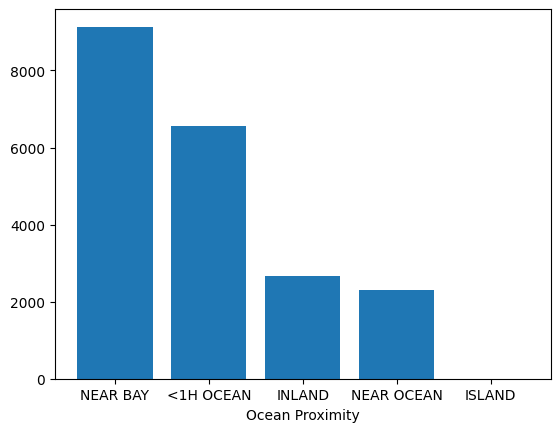

In [19]:
proximity = housing['ocean_proximity'].unique()
counts = list(housing['ocean_proximity'].value_counts())
plt.bar(x = proximity, height=counts)
plt.xlabel("Ocean Proximity")
plt.ylabel("")

In [20]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


- The descriptive statistics above indicate that the mean of the median house prices is $206855.81. Also, 25% of the median house values are above $264725.
- 25% of houses are no more than 18 years old and 25% are at  least 37 years old.
- Histograms are plotted below to get a better feel of the data.

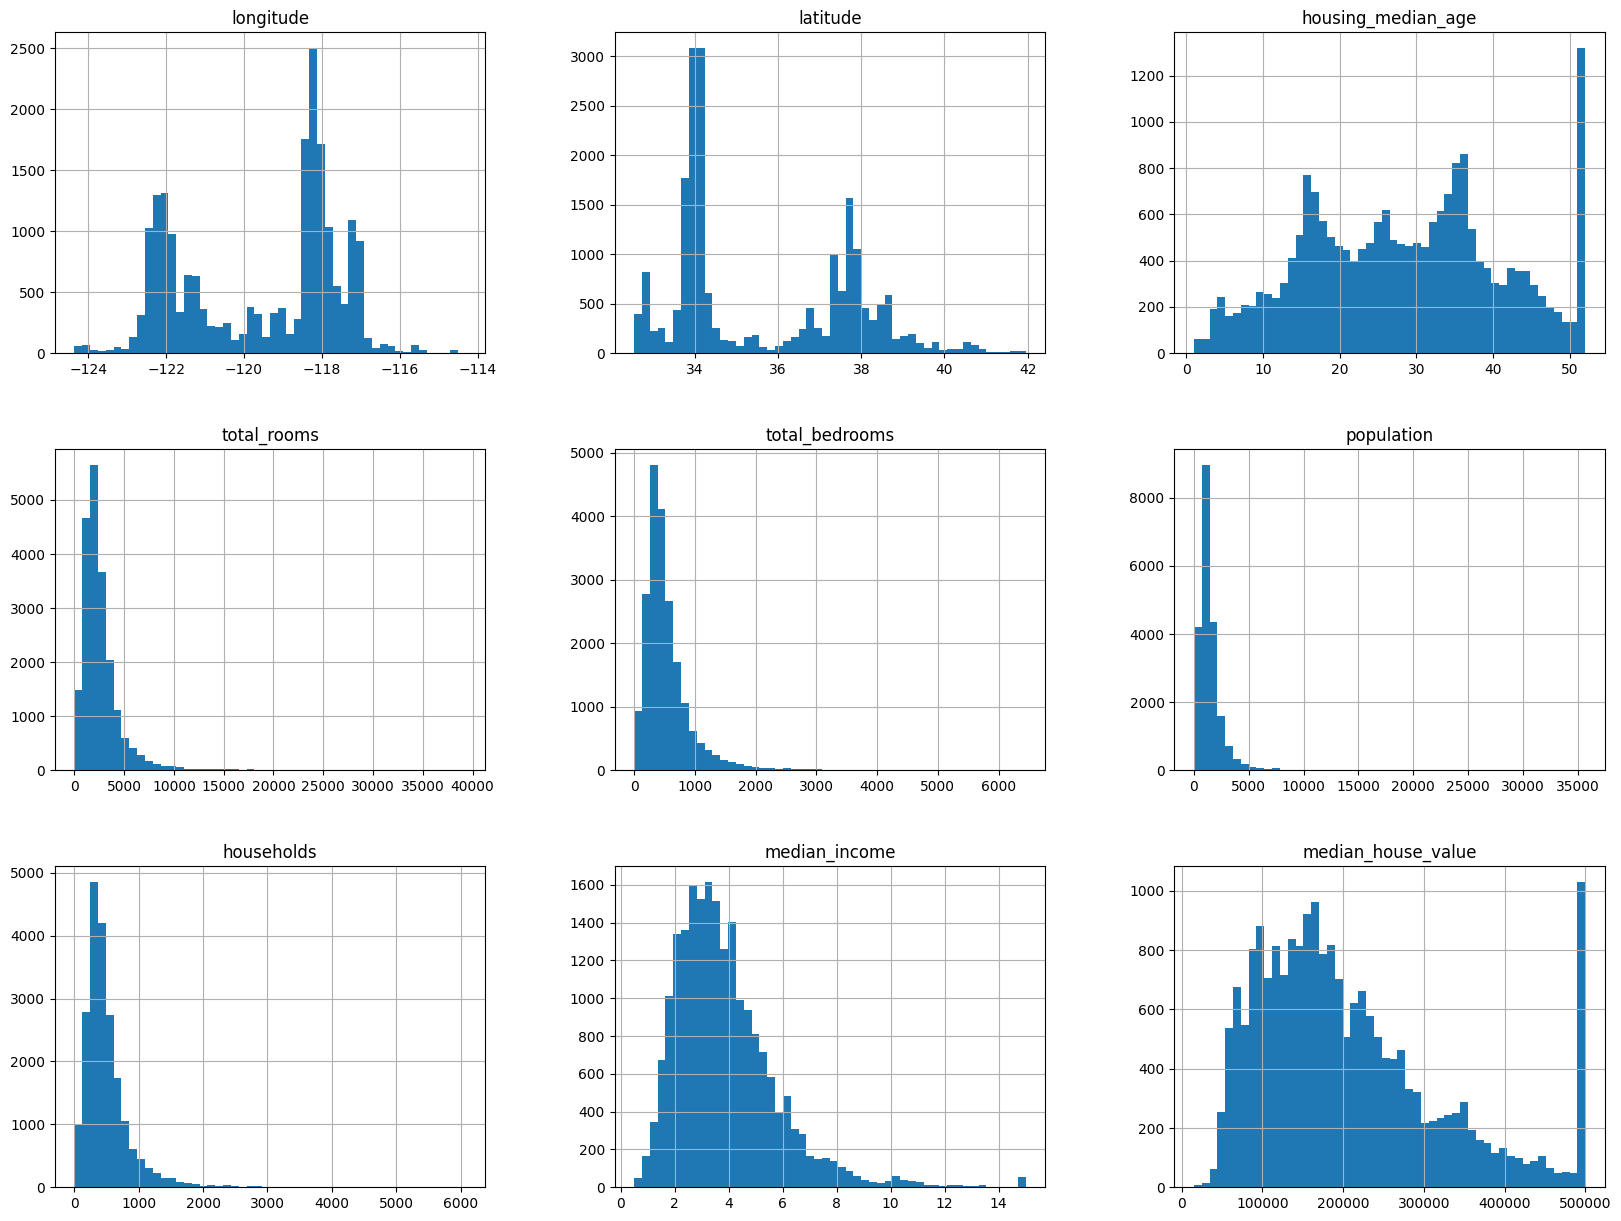

In [22]:
housing.hist(bins=50,figsize=(20,15));

- The data generally is skewed. Hence, it is beneficial to transform the data to achiven normality
- Hose prices and income features are capped.

### Train-Test Split
- Using scikit-learn's _train_tesst_split_ the data is splie into training, validation, and test data:

In [ ]:
xTrain0, xTest, yTrain0, yTest = train_test_split(housing, housing.target)

xTrain, xValid, yTrain, yVali = train_test_split(xTrain0, yTrain0)

## Train-Test Split Again
- This splitting method ignores the features of the data.
- Let us assume that income level is a signmificant feature in our study.
- We can make sure that the training, validation and test datasets have similar distributions

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64


<Axes: >

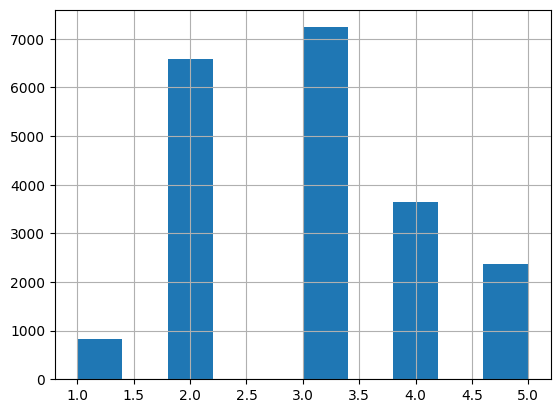

In [26]:
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[.0,1.5,3.0,4.5,6.,np.inf],
                               labels=[1,2,3,4,5])
print(housing['income_cat'].value_counts())
housing['income_cat'].hist()

In [17]:
#Define a scaler for the data
scaler = StandardScaler()

# Fit and transform the xTrain data
xTrain = scaler.fit_transform(xTrain)

# Transform the Validation and test data
xTest = scaler.transform(xTest)
xValid = scaler.transform(xValid)

In [18]:
xTrain.shape

(11610, 8)

## Define a Sequential API model

In [19]:
model = keras.models.Sequential(
    [
        keras.layers.Dense(30, activation = 'relu',
                           input_shape = xTrain.shape[1:],
                           name = 'Inputs'),
        keras.layers.Dense(10, activation = 'relu',
                           name = 'Hidden1'),
        keras.layers.Dense(1,
                           name = 'Output')
    ]
)

model.summary()

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Inputs (Dense)                  │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden1 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591 (2.31 KB)

 Trainable params: 591 (2.31 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the model:

In [20]:
model.compile(loss='mean_squared_error',
              optimizer = 'sgd')

## Train the model:

In [27]:
history = model.fit(xTrain, yTrain,
          epochs = 20,
          validation_data = (xValid, yVali))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3473 - val_loss: 0.3198
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3258 - val_loss: 0.3218
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3332 - val_loss: 0.3425
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3313 - val_loss: 0.3166
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3385 - val_loss: 0.3175
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3260 - val_loss: 0.3155
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3110 - val_loss: 0.3145
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3269 - val_loss: 0.3139
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3183 - val_loss: 0.3111
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3103 - val_loss: 0.3223
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3173 - val_loss: 0.3260
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

## Testing the model:

<Axes: >

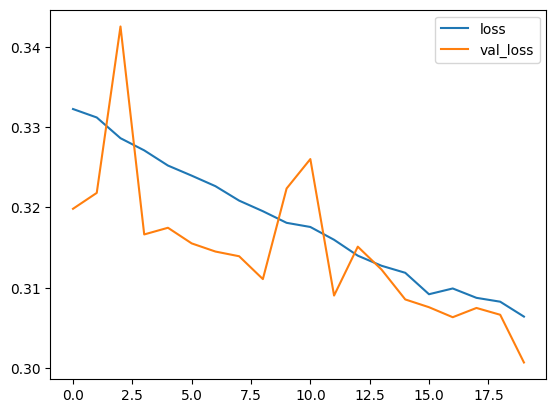

In [28]:
pd.DataFrame(history.history).plot()

In [29]:
model.evaluate(xTest, yTest)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - loss: 0.3374


0.3253723978996277

## Wide & Deep Neural Network

- To preserve some simple patterns one can connect inputs directly o the output
- This approach is known as the *Functional API* 


In [24]:
input_ = keras.layers.Input(shape=xTrain.shape[1:],
                             name = 'InputFunc')
hidden1 = keras.layers.Dense(30, 
                             activation='relu',
                             name = 'Hidden1Func'
                             )(input_)
hidden2 = keras.layers.Dense(10, 
                             activation='relu',
                             name = 'Hidden2Func'
                             )(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat
                             #name = 'OutputFunc'
                             )

model2 = keras.Model(inputs = [input_], 
                     outputs = [output])

model2.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ InputFunc           │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Hidden1Func (Dense) │ (None, 30)        │        270 │ InputFunc[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Hidden2Func (Dense) │ (None, 10)        │        310 │ Hidden1Func[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 18)        │          0 │ InputFunc[0][0],  │
│ (Concatenate)       │                   │            │ Hidden2Func[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         19 │ concatenate_2[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 599 (2.34 KB)

 Trainable params: 599 (2.34 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4097 - val_loss: 2.1752
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 1.7633 - val_loss: 2.2203
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6555 - val_loss: 32.2715
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 0.8974 - val_loss: 24.4387
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.9984 - val_loss: 4.7567
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2120 - val_loss: 5.2718
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 49254526036738048.0000 - val_loss: 1089579515904000.0000
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 611948819382272.0000 - val_loss: 21408807649280.0000
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 649169731584.0000 - val_loss: 6314407231488.0000
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 773964759040.0000 - val_loss: 1296787177472.0000
Epoch 11/20
363/363 ━━━━━━━━━

<Axes: >

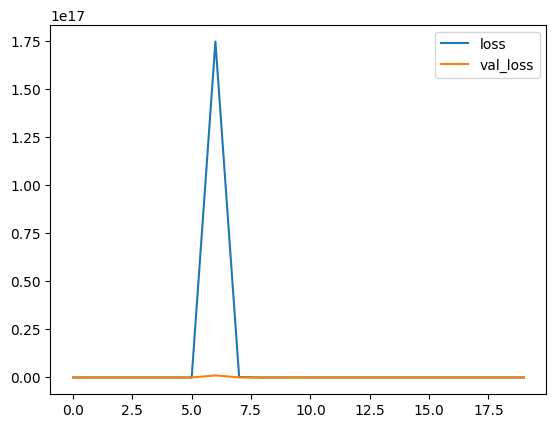

In [25]:
model2.compile(loss='mean_squared_error',
              optimizer = 'sgd')
history2 = model2.fit(xTrain, yTrain,
          epochs = 20,
          validation_data = (xValid, yVali),
          verbose = True)
pd.DataFrame(history2.history).plot()

In [26]:
model2.evaluate(xTest, yTest)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 385081632.0000


421893600.0

## Functional API with Call Backs



In [31]:
input_ = keras.layers.Input(shape=xTrain.shape[1:],
                             name = 'InputFunc')
hidden1 = keras.layers.Dense(30, 
                             activation='relu',
                             name = 'Hidden1Func'
                             )(input_)
hidden2 = keras.layers.Dense(10, 
                             activation='relu',
                             name = 'Hidden2Func'
                             )(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat
                             #name = 'OutputFunc'
                             )

model2 = keras.Model(inputs = [input_], 
                     outputs = [output])

model2.compile(loss='mean_squared_error',
              optimizer = 'sgd')

checkPoint = keras.callbacks.ModelCheckpoint("SavedModels/02ModelCheckPoint.keras",
                                             save_best_only = True)

history3 = model2.fit(xTrain, yTrain,
          epochs = 20,
          validation_data = (xValid, yVali),
          verbose = True,
          callbacks=[checkPoint])

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5690 - val_loss: 64.3206
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.5196 - val_loss: 63.7024
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.1173 - val_loss: 48.2962
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.1560 - val_loss: 15.6225
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.7993 - val_loss: 491.1631
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 237.1050 - val_loss: 14105.3086
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 811.8514 - val_loss: 2684.9387
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 61.2902 - val_loss: 491.7443
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 146.2968 - val_loss: 105.0156
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7231 - val_loss: 11.8973
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6878 - val_loss: 5.0059
Epoch 12/20
363/363 ━━━━━━

<Axes: >

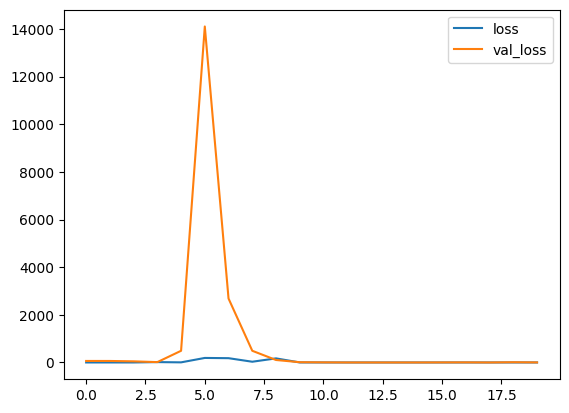

In [32]:
pd.DataFrame(history3.history).plot()

In [33]:
model2.evaluate(xTest, yTest)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 0.6852


0.8603449463844299

In [34]:
input_ = keras.layers.Input(shape=xTrain.shape[1:],
                             name = 'InputFunc')
hidden1 = keras.layers.Dense(30, 
                             activation='relu',
                             name = 'Hidden1Func'
                             )(input_)
hidden2 = keras.layers.Dense(10, 
                             activation='relu',
                             name = 'Hidden2Func'
                             )(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat
                             #name = 'OutputFunc'
                             )

model3 = keras.Model(inputs = [input_], 
                     outputs = [output])

model3.compile(loss='mean_squared_error',
              optimizer = 'sgd')

checkPoint = keras.callbacks.ModelCheckpoint("SavedModels/02Model3CheckPoint.keras",
                                             save_best_only = True)
earlyStop = keras.callbacks.EarlyStopping(patience = 10,
                                          restore_best_weights = True)

history3 = model3.fit(xTrain, yTrain,
          epochs = 50,
          validation_data = (xValid, yVali),
          verbose = True,
          callbacks=[checkPoint, earlyStop])

Epoch 1/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7235 - val_loss: 39.8846
Epoch 2/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 57.5282 - val_loss: 32225.9121
Epoch 3/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 218.6768 - val_loss: 7140.3833
Epoch 4/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 231.4821 - val_loss: 1519.9219
Epoch 5/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 73.9717 - val_loss: 618.9625
Epoch 6/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 32.0007 - val_loss: 158.6824
Epoch 7/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 51.1493 - val_loss: 38.0732
Epoch 8/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.5398 - val_loss: 13.5815
Epoch 9/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.3287 - val_loss: 3.6266
Epoch 10/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6734 - val_loss: 3.2580
Epoch 11/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7088 - val_loss: 0.9094
Epoch 12/50
363/363 ━━━━━━━

<Axes: >

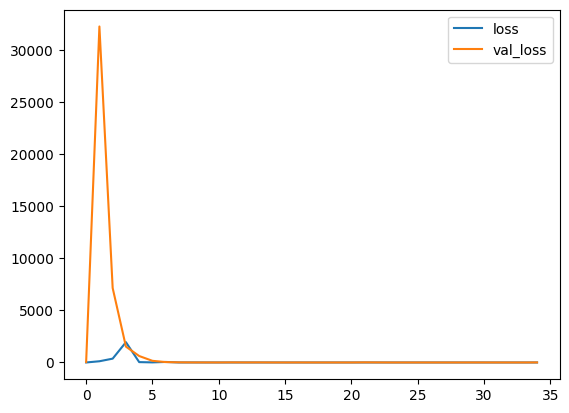

In [35]:
pd.DataFrame(history3.history).plot()

In [36]:
model3.evaluate(xTest, yTest)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5450  


0.5373203158378601